In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

In [31]:
def load_and_clean_data():
    """
    Load the Diabetes dataset and clean it for analysis
    Returns: cleaned pandas DataFrame
    """
    # Loading Diabetes dataset
    df = pd.read_csv('diabetes.csv')

    # Basic cleaning
    # Replace 0 values with NaN for certain columns where 0 is not possible
    zero_not_possible = ['Glucose', 'BloodPressure', 'SkinThickness', 'BMI', 'Insulin']
    for column in zero_not_possible:
        df[column] = df[column].replace(0, np.nan)

    # Fill NaN values with median of respective columns
    for column in zero_not_possible:
        df[column] = df[column].fillna(df[column].median())

    return df

In [32]:
def create_age_distribution_plot(df):
    """
    Create a histogram showing age distribution with diabetes status
    """
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df, x='Age', hue='Outcome', bins=30, multiple="layer", alpha=0.6)
    plt.title('Age Distribution by Diabetes Status')
    plt.xlabel('Age')
    plt.ylabel('Count')
    plt.legend(labels=['No Diabetes', 'Diabetes'])
    plt.tight_layout()
    plt.savefig('age_distribution.png')
    plt.show()
    plt.close()

    return df['Age'].describe()

In [33]:
def create_glucose_bmi_scatter(df):
    """
    Create a scatter plot of Glucose vs BMI with diabetes outcome color coding
    """
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df, x='Glucose', y='BMI', hue='Outcome', alpha=0.6)
    plt.title('Glucose vs BMI by Diabetes Status')
    plt.xlabel('Glucose Level')
    plt.ylabel('BMI')
    plt.legend(labels=['No Diabetes', 'Diabetes'])
    plt.tight_layout()
    plt.savefig('glucose_bmi_scatter.png')
    plt.show()
    plt.close()

    return df[['Glucose', 'BMI']].corr()

In [34]:
def create_correlation_heatmap(df):
    """
    Create a heatmap showing correlations between all features
    """
    plt.figure(figsize=(12, 8))
    correlation_matrix = df.corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Correlation Heatmap of Diabetes Features')
    plt.tight_layout()
    plt.savefig('correlation_heatmap.png')
    plt.show()
    plt.close()

    return correlation_matrix

In [35]:
def train_and_evaluate_model(df):
    """
    Train a Random Forest model and return performance metrics
    """
    X = df.drop('Outcome', axis=1)
    y = df['Outcome']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = RandomForestClassifier(random_state=42)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    conf_matrix = confusion_matrix(y_test, y_pred)

    return conf_matrix, classification_report(y_test, y_pred)


In [36]:

def generate_statistics(df):
    """
    Generate descriptive statistics for the dataset
    """
    return {
        'basic_stats': df.describe(),
        'correlations': df.corr(),
        'diabetes_ratio': df['Outcome'].value_counts(normalize=True),
        'feature_importance': df.drop('Outcome', axis=1).corrwith(df['Outcome']).sort_values(ascending=False)
    }

In [39]:
def main():
    # Load and clean data
    df = load_and_clean_data()

    # Generate plots
    age_stats = create_age_distribution_plot(df)
    glucose_bmi_corr = create_glucose_bmi_scatter(df)
    correlation_matrix = create_correlation_heatmap(df)

    # Generate statistics and model evaluation
    stats = generate_statistics(df)
    conf_matrix, class_report = train_and_evaluate_model(df)

    # Print some text output for the analysis
    print("Descriptive Statistics:\n", stats['basic_stats'])
    print("\nCorrelation Matrix:\n", stats['correlations'])
    print("\nDiabetes Ratio:\n", stats['diabetes_ratio'])
    print("\nFeature Importance:\n", stats['feature_importance'])
    print("\nConfusion Matrix:\n", conf_matrix)
    print("\nClassification Report:\n", class_report)
    print("\nAge Statistics:\n", age_stats)
    print("\nGlucose vs BMI Correlation:\n", glucose_bmi_corr)

    return df, stats, conf_matrix, class_report

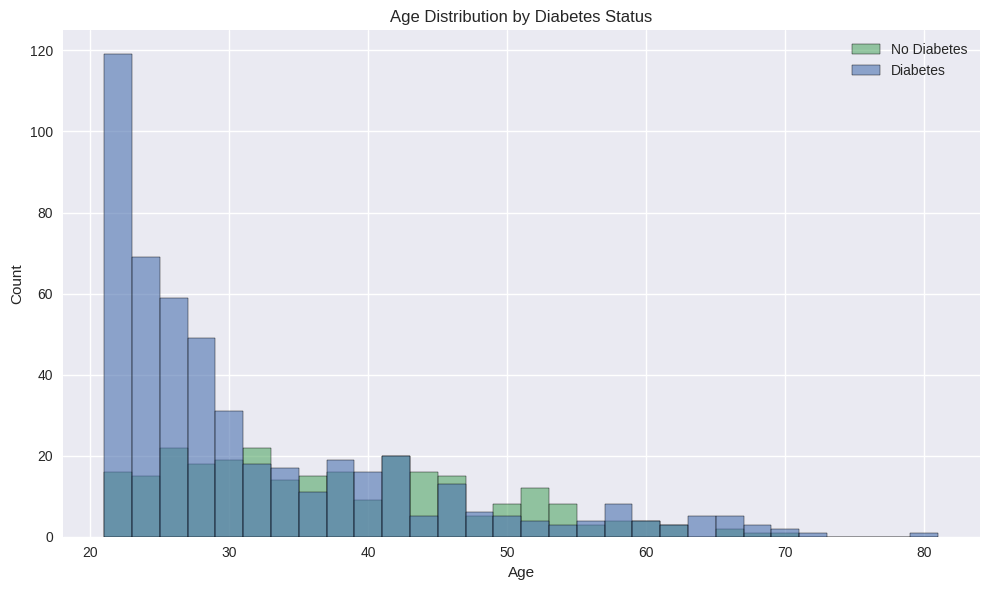

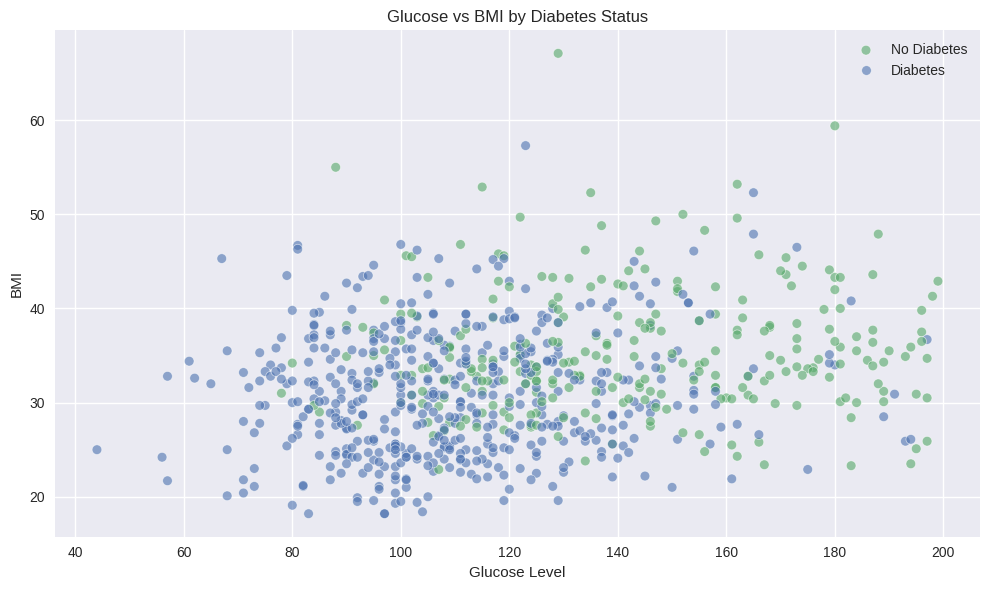

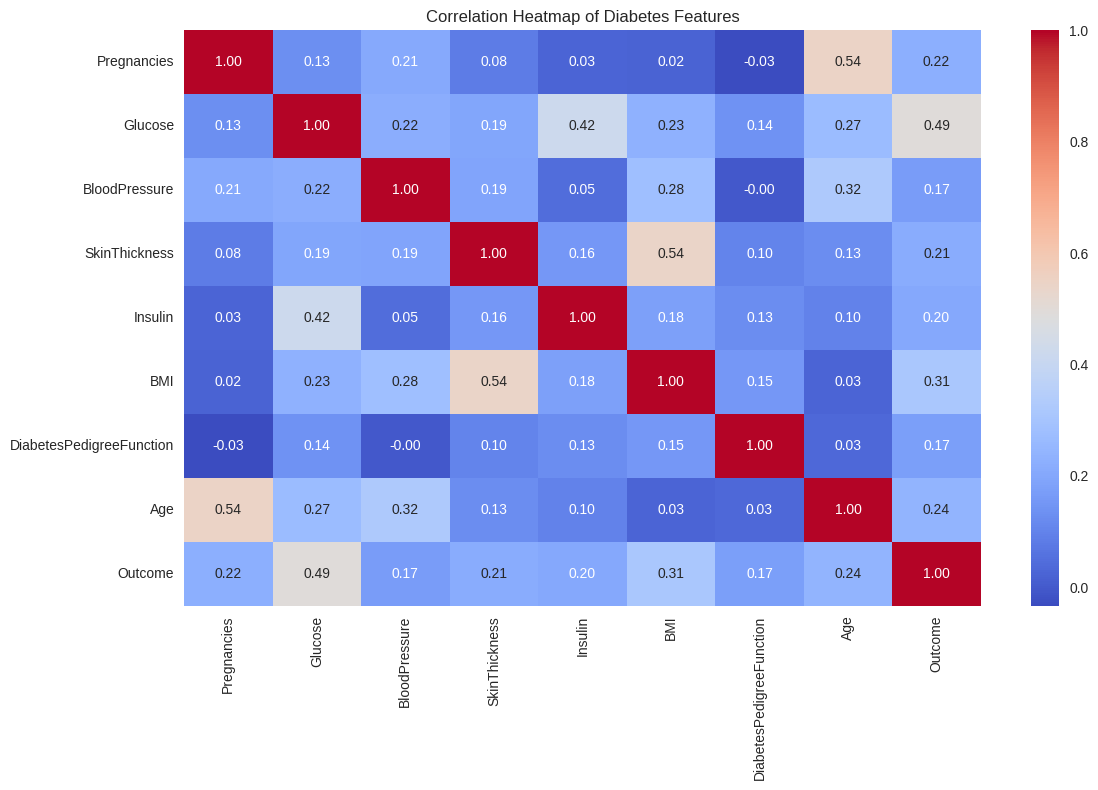

Descriptive Statistics:
        Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  121.656250      72.386719      29.108073  140.671875   
std       3.369578   30.438286      12.096642       8.791221   86.383060   
min       0.000000   44.000000      24.000000       7.000000   14.000000   
25%       1.000000   99.750000      64.000000      25.000000  121.500000   
50%       3.000000  117.000000      72.000000      29.000000  125.000000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    32.455208                  0.471876   33.240885    0.348958  
std      6.875177                  0.331329   11.760232    0.476951  
min     18

In [40]:
if __name__ == "__main__":
    df, stats, conf_matrix, class_report = main()